## Parte 1: Derivación Numérica 

Consigna: Implementar los métodos de diferencias finitas hacia adelante, hacia atrás y centradas. Crear funciones en Python para cada método y aplicarlas a la función.  

$$
f(x) = \left(\frac{3x - 1}{x^2 + 3}\right)^2 
\Rightarrow 
f'(x) = \frac{-18 + 50x + 18x^2 - 18x^3}{(x^2 + 3)^3}
\quad \text{para } x = 1 \text{ y } h = 0.1
$$

Análisis: Comparar los resultados obtenidos con la derivada analítica y graficar el error relativo para cada método.

In [49]:
from sympy import Integral, symbols, lambdify, diff
from scipy.integrate import quad
import numpy as np
import pandas as pd

# Funcion
x = symbols('x')
f = ((3 * x - 1) / (x**2 + 3))**2
print("Funcion f(x):")
display(f)

# Derivada 
f_prima = diff(f, x)
print("Derivada f'(x):")
display(f_prima)

f_func = lambdify(x, f, 'numpy')
f_prima_func = lambdify(x, f_prima, 'numpy')

# Valores de x con un salto de h = 0.1
x_valores = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])

# Calculo los valores de f(x) (y) y f'(x) (y')
y_valores = f_func(x_valores)
y_prima_valores = f_prima_func(x_valores)

#DataFrame para la tabla
tabla = pd.DataFrame({
    'x': x_valores,
    'y (f(x))': y_valores,
    "y' (f'(x))": y_prima_valores
})


display(tabla)


Funcion f(x):


(3*x - 1)**2/(x**2 + 3)**2

Derivada f'(x):


-4*x*(3*x - 1)**2/(x**2 + 3)**3 + (18*x - 6)/(x**2 + 3)**2

,x,y (f(x)),y' (f'(x))
0,0.7,0.099342,0.462166
1,0.8,0.147929,0.503934
2,0.9,0.199089,0.514552
3,1.0,0.250000,0.500000
4,1.1,0.298464,0.466667
5,1.2,0.342910,0.420618
6,1.3,0.382341,0.367132


# Fórmulas de las Derivadas Numéricas

## Derivada Hacia Adelante
**Primera Forma:**
$$
f'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h}
$$

**Segunda Forma:**
$$
f'(x_0) = \frac{-f(x_0 + 2h) + 4f(x_0 + h) - 3f(x_0)}{2h}
$$

## Derivada Hacia Atrás
**Primera Forma:**
$$
f'(x_0) = \frac{f(x_0) - f(x_0 - h)}{h}
$$

**Segunda Forma:**
$$
f'(x_0) = \frac{3f(x_0) - 4f(x_0 - h) + f(x_0 - 2h)}{2h}
$$

## Derivada Centrada
**Primera Forma:**
$$
f'(x_0) = \frac{f(x_0 + h) - f(x_0 - h)}{2h}
$$

**Segunda Forma:**
$$
f'(x_0) = \frac{-f(x_0 + 2h) + 8f(x_0 + h) - 8f(x_0 - h) + f(x_0 - 2h)}{12h}
$$


In [42]:
# Valores iniciales
x_values = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])
h = x_values[1] - x_values[0]  # Incremento constante

# Índice del punto x = 1
indice = np.where(x_values == 1.0)[0][0]

# Calculo derivada hacia adelante (primera diferencia) en x = 1

DerivadaAdelante_1 = (y_valores[indice + 1] - y_valores[indice]) / h

# Calculo derivada hacia adelante (segunda diferencia) en x = 1
DerivadaAdelante_2 = (-y_valores[indice + 2] + 4 * y_valores[indice + 1] - 3 * y_valores[indice]) / (2 * h)

# Valor exacto de la derivada en x = 1
derivada_exacta = y_prima_valores[indice]

# Calculo errores reales y porcentuales
error_real_1 = abs(DerivadaAdelante_1 - derivada_exacta)
error_porcent_1 = 100 * error_real_1 / abs(derivada_exacta)

error_real_2 = abs(DerivadaAdelante_2 - derivada_exacta)
error_porcent_2 = 100 * error_real_2 / abs(derivada_exacta)

# Imprimir resultados
print("Diferencias finitas hacia adelante ")
print(f"{'Método':<25}{'Valor':<15}{'Error Real':<15}{'Error %':<15}")
print(f"{'Hacia Adelante 1ª Dif':<25}{DerivadaAdelante_1:<15.6f}{error_real_1:<15.6f}{error_porcent_1:<15.2f}")
print(f"{'Hacia Adelante 2ª Dif':<25}{DerivadaAdelante_2:<15.6f}{error_real_2:<15.6f}{error_porcent_2:<15.2f}")


Diferencias finitas hacia adelante 
Método                   Valor          Error Real     Error %        
Hacia Adelante 1ª Dif    0.484637       0.015363       3.07           
Hacia Adelante 2ª Dif    0.504721       0.004721       0.94           


In [24]:
# Calculo derivada hacia atrás (primera diferencia) en x = 1
DerivadaAtras_1 = (y_valores[indice] - y_valores[indice - 1]) / h

# Calculo derivada hacia atrás (segunda diferencia) en x = 1
DerivadaAtras_2 = (3 * y_valores[indice] - 4 * y_valores[indice - 1] + y_valores[indice - 2]) / (2 * h)

# Calculo errores reales y porcentuales para las diferencias hacia atrás
error_real_1_atras = abs(DerivadaAtras_1 - derivada_exacta)
error_porcent_1_atras = 100 * error_real_1_atras / abs(derivada_exacta)

error_real_2_atras = abs(DerivadaAtras_2 - derivada_exacta)
error_porcent_2_atras = 100 * error_real_2_atras / abs(derivada_exacta)

# Mostrar resultados
print("\nDiferencias finitas hacia atrás ")
print(f"{'Método':<25}{'Valor':<15}{'Error Real':<15}{'Error %':<15}")
print(f"{'Hacia Atrás 1ª Dif':<25}{DerivadaAtras_1:<15.6f}{error_real_1_atras:<15.6f}{error_porcent_1_atras:<15.2f}")
print(f"{'Hacia Atrás 2ª Dif':<25}{DerivadaAtras_2:<15.6f}{error_real_2_atras:<15.6f}{error_porcent_2_atras:<15.2f}")



Diferencias finitas hacia atrás 
Método                   Valor          Error Real     Error %        
Hacia Atrás 1ª Dif       0.509107       0.009107       1.82           
Hacia Atrás 2ª Dif       0.507859       0.007859       1.57           


In [26]:
# Calculo derivada centrada (primera diferencia) en x = 1
DerivadaCentrada_1 = (y_valores[indice + 1] - y_valores[indice - 1]) / (2 * h)

# Calculo derivada centrada (segunda diferencia) en x = 1
DerivadaCentrada_2 = (-y_valores[indice + 2] + 8 * y_valores[indice + 1] - 8 * y_valores[indice - 1] + y_valores[indice - 2]) / (12 * h)

# Calculo errores reales y porcentuales para las diferencias centradas
error_real_1_centrada = abs(DerivadaCentrada_1 - derivada_exacta)
error_porcent_1_centrada = 100 * error_real_1_centrada / abs(derivada_exacta)

error_real_2_centrada = abs(DerivadaCentrada_2 - derivada_exacta)
error_porcent_2_centrada = 100 * error_real_2_centrada / abs(derivada_exacta)

# Mostrar resultados
print("\nDiferencias finitas centradas ")
print(f"{'Método':<25}{'Valor':<15}{'Error Real':<15}{'Error %':<15}")
print(f"{'Centrada 1ª Dif':<25}{DerivadaCentrada_1:<15.6f}{error_real_1_centrada:<15.6f}{error_porcent_1_centrada:<15.2f}")
print(f"{'Centrada 2ª Dif':<25}{DerivadaCentrada_2:<15.6f}{error_real_2_centrada:<15.6f}{error_porcent_2_centrada:<15.2f}")



Diferencias finitas centradas 
Método                   Valor          Error Real     Error %        
Centrada 1ª Dif          0.496872       0.003128       0.63           
Centrada 2ª Dif          0.500011       0.000011       0.00           


In [64]:
# Crear una tabla comparativa para las aproximaciones de derivadas
derivadas_comparacion = pd.DataFrame({
    'Método': [
        "Hacia Adelante 1ª Dif", "Hacia Adelante 2ª Dif",
        "Hacia Atrás 1ª Dif", "Hacia Atrás 2ª Dif",
        "Centrada 1ª Dif", "Centrada 2ª Dif"
    ],
    'Derivada Exacta': [
        derivada_exacta, derivada_exacta,
        derivada_exacta, derivada_exacta,
        derivada_exacta, derivada_exacta
    ],
    'Derivada Aproximada': [
        DerivadaAdelante_1, DerivadaAdelante_2,
        DerivadaAtras_1, DerivadaAtras_2,
        DerivadaCentrada_1, DerivadaCentrada_2
    ],
    'Error Absoluto': [
        error_real_1, error_real_2,
        error_real_1_atras, error_real_2_atras,
        error_real_1_centrada, error_real_2_centrada
    ],
    'Error Relativo': [
        error_real_1 / abs(derivada_exacta), error_real_2 / abs(derivada_exacta),
        error_real_1_atras / abs(derivada_exacta), error_real_2_atras / abs(derivada_exacta),
        error_real_1_centrada / abs(derivada_exacta), error_real_2_centrada / abs(derivada_exacta)
    ],
    'Error Porcentual (%)': [
        error_porcent_1, error_porcent_2,
        error_porcent_1_atras, error_porcent_2_atras,
        error_porcent_1_centrada, error_porcent_2_centrada
    ]
})



display(derivadas_comparacion)


,Método,Derivada Exacta,Derivada Aproximada,Error Absoluto,Error Relativo,Error Porcentual (%)
0,Hacia Adelante 1ª Dif,0.5,0.484637,0.015363,0.030727,3.072652
1,Hacia Adelante 2ª Dif,0.5,0.504721,0.004721,0.009442,0.944217
2,Hacia Atrás 1ª Dif,0.5,0.509107,0.009107,0.018214,1.821426
3,Hacia Atrás 2ª Dif,0.5,0.507859,0.007859,0.015718,1.571846
4,Centrada 1ª Dif,0.5,0.496872,0.003128,0.006256,0.625613
5,Centrada 2ª Dif,0.5,0.500011,0.000011,0.000023,0.002268


array([0.0001    , 0.00021544, 0.00046416, 0.001     , 0.00215443,
       0.00464159, 0.01      , 0.02154435, 0.04641589, 0.1       ])

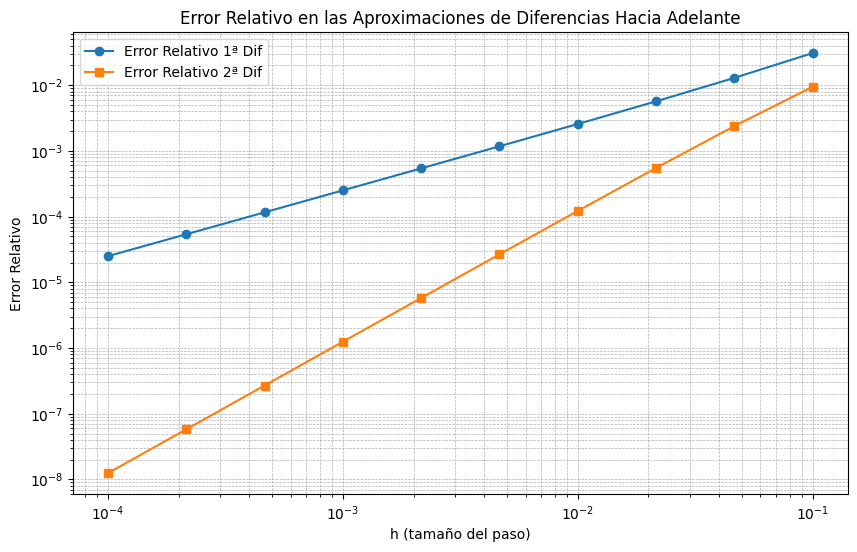

In [ ]:
# import matplotlib.pyplot as plt

# # Valores de h en escala logarítmica para evaluar la convergencia
# h_values = np.logspace(-4, -1, 10)
# display(h_values)
# # Calculo errores relativos para cada h
# errors_relative_1st = []
# errors_relative_2nd = []

# for h in h_values:
#     # Primera diferencia hacia adelante
#     forward_diff_1st = (f_func(1 + h) - f_func(1)) / h
#     error_real_1 = abs(forward_diff_1st - derivada_exacta)
#     error_relative_1st = error_real_1 / abs(derivada_exacta)
#     errors_relative_1st.append(error_relative_1st)

#     # Segunda diferencia hacia adelante
#     DerivadaAdelante_2 = (-f_func(1 + 2 * h) + 4 * f_func(1 + h) - 3 * f_func(1)) / (2 * h)
#     error_real_2 = abs(DerivadaAdelante_2 - derivada_exacta)
#     error_relative_2nd = error_real_2 / abs(derivada_exacta)
#     errors_relative_2nd.append(error_relative_2nd)

# # Graficar los errores relativos
# plt.figure(figsize=(10, 6))
# plt.loglog(h_values, errors_relative_1st, marker='o', label="Error Relativo 1ª Dif")
# plt.loglog(h_values, errors_relative_2nd, marker='s', label="Error Relativo 2ª Dif")
# plt.xlabel("h (tamaño del paso)")
# plt.ylabel("Error Relativo")
# plt.title("Error Relativo en las Aproximaciones de Diferencias Hacia Adelante")
# plt.legend()
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.show()


Derivada analítica f'(x):


-4*x*(3*x - 1)**2/(x**2 + 3)**3 + (18*x - 6)/(x**2 + 3)**2

Derivada analítica en x=1: 0.500000
Diferencia finita hacia adelante: 0.484637 (Error relativo: 3.07%)
Diferencia finita hacia atrás: 0.509107 (Error relativo: 1.82%)
Diferencia finita centrada: 0.496872 (Error relativo: 0.63%)


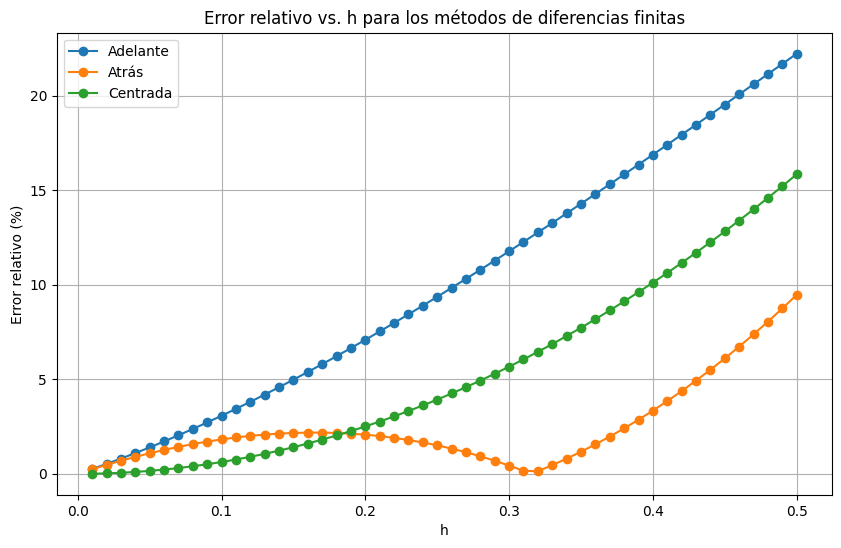

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir la función f(x) en SymPy
x = sp.symbols('x')
f_expr = ((3 * x - 1) / (x**2 + 3))**2

# Derivada analítica usando SymPy
f_prima_expr = sp.diff(f_expr, x)
print("Derivada analítica f'(x):")
display(f_prima_expr)

# Función f(x) y su derivada f'(x) evaluadas en Python usando NumPy
def f(x):
    return ((3 * x - 1) / (x**2 + 3))**2

def f_prima(x):
    return (-18 + 50 * x + 18 * x**2 - 18 * x**3) / ((x**2 + 3)**3)

# Método de diferencia finita hacia adelante
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

# Método de diferencia finita hacia atrás
def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

# Método de diferencia centrada
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Parámetros
x_value = 1
h = 0.1

# Cálculo de la derivada numérica usando los tres métodos
forward_result = forward_difference(f, x_value, h)
backward_result = backward_difference(f, x_value, h)
central_result = central_difference(f, x_value, h)
analytical_result = f_prima(x_value)

# Calculo los errores relativos
def relative_error(approx, exact):
    return abs((approx - exact) / exact) * 100

forward_error = relative_error(forward_result, analytical_result)
backward_error = relative_error(backward_result, analytical_result)
central_error = relative_error(central_result, analytical_result)

# Mostrar resultados
print(f"Derivada analítica en x={x_value}: {analytical_result:.6f}")
print(f"Diferencia finita hacia adelante: {forward_result:.6f} (Error relativo: {forward_error:.2f}%)")
print(f"Diferencia finita hacia atrás: {backward_result:.6f} (Error relativo: {backward_error:.2f}%)")
print(f"Diferencia finita centrada: {central_result:.6f} (Error relativo: {central_error:.2f}%)")

# Graficar el error relativo para diferentes valores de h
h_valores = np.linspace(0.01, 0.5, 50)
forward_errors = [relative_error(forward_difference(f, x_value, h), analytical_result) for h in h_valores]
backward_errors = [relative_error(backward_difference(f, x_value, h), analytical_result) for h in h_valores]
central_errors = [relative_error(central_difference(f, x_value, h), analytical_result) for h in h_valores]

plt.figure(figsize=(10, 6))
plt.plot(h_valores, forward_errors, label='Adelante', marker='o')
plt.plot(h_valores, backward_errors, label='Atrás', marker='o')
plt.plot(h_valores, central_errors, label='Centrada', marker='o')
plt.xlabel('h')
plt.ylabel('Error relativo (%)')
plt.title('Error relativo vs. h para los métodos de diferencias finitas')
plt.legend()
plt.grid(True)
plt.show()


## Parte 2: Integración Numérica

**Objetivo:** Implementar la regla del trapecio (con intervalos múltiples) y las reglas de Simpson 1/3 y 3/8.

**Consigna:** Programar cada método y aplicarlo para Calculo

$$
\int_{1}^{2} \frac{x^3}{1 + x^{1/2}} \, dx \quad \text{con } h = 0.25
$$

**Análisis:** Comparar los resultados obtenidos con la solución exacta.



### Fórmula: Regla del Trapecio

La aproximación del área utilizando la regla del trapecio se calcula como:

$$
A = \frac{1}{2} h \left( f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)
\quad \text{donde} \quad h = \frac{b - a}{n}
$$

Con:
- \( a = 1 \)
- \( b = 2 \)
- \( h = 0.25 \)

Cantidad de intervalos => n = 4

In [51]:
from sympy import Integral

# Definir el símbolo y la función
x = symbols('x')
f = x**3 / (1 + x**(1/2))
print("Función f(x):")
display(f)
# Convertir la función a Python
f_func = lambdify(x, f, 'numpy')

# Definir los extremos y el salto
a = 1
b = 2
h = 0.25

# Calculo los valores de x
x_valores = np.arange(a, b + h, h)

# Calculo los valores de f(x)
y_valores = f_func(x_valores)


# Calculo la integral 

integral_f = Integral(f, (x, 1, 2))
print("Integral de f(x):")
display(integral_f)

integral_real, error = quad(f_func, 1, 2)
print(f"Valor real de la integral: {integral_real:.6f}")


# Crear una tabla con los valores
tabla = pd.DataFrame({
    'x': x_valores,
    'f(x)': y_valores
})
display(tabla)



Función f(x):


x**3/(x**0.5 + 1)

Integral de f(x):


Integral(x**3/(x**0.5 + 1), (x, 1, 2))

Valor real de la integral: 1.647108


,x,f(x)
0,1.00,0.500000
1,1.25,0.922141
2,1.50,1.517028
3,1.75,2.307216
4,2.00,3.313708


In [54]:
# Regla del trapecio
def regla_trapecio(f, a, b, n):
    h = (b - a) / n
    x_vals = np.linspace(a, b, n + 1)
    y_vals = f(x_vals)
    
    integral = y_vals[0] + y_vals[-1] + 2 * sum(y_vals[1:-1])
    integral *= h / 2
    return integral

# Aplicar la regla del trapecio
n_intervals = 4  # 4 intervalos como se indica
integral_trapecio = regla_trapecio(f_func, a, b, n_intervals)

# Calcular errores para la regla del trapecio
error_absoluto_trapecio = abs(integral_trapecio - integral_real)
error_relativo_trapecio = error_absoluto_trapecio / abs(integral_real)
error_porcentual_trapecio = error_relativo_trapecio * 100

# Mostrar resultados
print("Resultados de la Regla del Trapecio")
print(f"{'Método':<20}: {'Regla del Trapecio'}")
print(f"{'Integral Aproximada':<20}: {integral_trapecio:.6f}")
print(f"{'Error Absoluto':<20}: {error_absoluto_trapecio:.6f}")
print(f"{'Error Relativo':<20}: {error_relativo_trapecio:.6f}")
print(f"{'Error Porcentual':<20}: {error_porcentual_trapecio:.2f}%")



Resultados de la Regla del Trapecio
Método              : Regla del Trapecio
Integral Aproximada : 1.663310
Error Absoluto      : 0.016202
Error Relativo      : 0.009836
Error Porcentual    : 0.98%


In [57]:
# Regla de Simpson 1/3
def simpson_1_3(f, a, b, n):
    
    h = (b - a) / n
    x_vals = np.linspace(a, b, n + 1)
    y_vals = f(x_vals)
    
    integral = y_vals[0] + y_vals[-1] + 4 * sum(y_vals[1:-1:2]) + 2 * sum(y_vals[2:-2:2])
    integral *= h / 3
    return integral

# Regla de Simpson 3/8
def simpson_3_8(f, a, b, n):
    
    h = (b - a) / n
    x_vals = np.linspace(a, b, n + 1)
    y_vals = f(x_vals)
    
    integral = y_vals[0] + y_vals[-1] + 3 * sum(y_vals[1:-1:3]) + 3 * sum(y_vals[2:-1:3]) + 2 * sum(y_vals[3:-3:3])
    integral *= 3 * h / 8
    return integral

# Aplicar reglas de Simpson
n_intervals = 4  # 4 intervalos para Simpson 1/3
integral_simpson_1_3 = simpson_1_3(f_func, a, b, n_intervals)

n_intervals = 3  # 3 intervalos para Simpson 3/8
integral_simpson_3_8 = simpson_3_8(f_func, a, b, n_intervals)

# Calcular errores para Simpson 1/3
error_absoluto_1_3 = abs(integral_simpson_1_3 - integral_real)
error_relativo_1_3 = error_absoluto_1_3 / abs(integral_real)
error_porcentual_1_3 = error_relativo_1_3 * 100

# Calcular errores para Simpson 3/8
error_absoluto_3_8 = abs(integral_simpson_3_8 - integral_real)
error_relativo_3_8 = error_absoluto_3_8 / abs(integral_real)
error_porcentual_3_8 = error_relativo_3_8 * 100

# Mostrar resultados mejorados
print("Resultados de las Reglas de Simpson")

# Resultados para Simpson 1/3
print("Simpson 1/3:")
print(f"{'Integral Aproximada':<25}: {integral_simpson_1_3:.6f}")
print(f"{'Error Absoluto':<25}: {error_absoluto_1_3:.6f}")
print(f"{'Error Relativo':<25}: {error_relativo_1_3:.6f}")
print(f"{'Error Porcentual':<25}: {error_porcentual_1_3:.2f}%")

# Resultados para Simpson 3/8
print("Simpson 3/8:")
print(f"{'Integral Aproximada':<25}: {integral_simpson_3_8:.6f}")
print(f"{'Error Absoluto':<25}: {error_absoluto_3_8:.6f}")
print(f"{'Error Relativo':<25}: {error_relativo_3_8:.6f}")
print(f"{'Error Porcentual':<25}: {error_porcentual_3_8:.2f}%")



Resultados de las Reglas de Simpson
Simpson 1/3:
Integral Aproximada      : 1.647099
Error Absoluto           : 0.000009
Error Relativo           : 0.000005
Error Porcentual         : 0.00%
Simpson 3/8:
Integral Aproximada      : 1.647046
Error Absoluto           : 0.000062
Error Relativo           : 0.000037
Error Porcentual         : 0.00%


In [62]:
# Crear una tabla comparativa de las integrales
comparacion_tabla = pd.DataFrame({
    'Método': ['Trapecios', 'Simpson 1/3', 'Simpson 3/8'],
    'Integral Real': [integral_real, integral_real, integral_real],
    'Integral Aproximada': [integral_trapecio, integral_simpson_1_3, integral_simpson_3_8],
    'Error Absoluto': [
        error_absoluto_trapecio, 
        error_absoluto_1_3, 
        error_absoluto_3_8
    ],
    'Error Relativo': [
        error_relativo_trapecio, 
        error_relativo_1_3, 
        error_relativo_3_8
    ],
    'Error Porcentual (%)': [
        error_porcentual_trapecio, 
        error_porcentual_1_3, 
        error_porcentual_3_8
    ]
})

display(comparacion_tabla)


,Método,Integral Real,Integral Aproximada,Error Absoluto,Error Relativo,Error Porcentual (%)
0,Trapecios,1.647108,1.663310,0.016202,0.009836,0.983641
1,Simpson 1/3,1.647108,1.647099,0.000009,0.000005,0.000539
2,Simpson 3/8,1.647108,1.647046,0.000062,0.000037,0.003738


## Parte 3: Resolución de Ecuaciones Diferenciales Ordinarias

**Objetivo:** Resolver ecuaciones diferenciales de primer orden usando los métodos de Euler, Euler mejorado, y Runge-Kutta de orden 4.

**Consigna:** Crear una función que implemente cada método y aplícalo para resolver

$$
y' = 2x - 3y + 1, \quad y(1) = 5; \quad y(1.5)
$$

Con \( h = 0.1 \).

**Análisis:** Comparar los resultados obtenidos con la solución analítica.


### Método de Euler
$$
y' = f(x, y), \quad y(x_0) = y_0
$$
$$
x_i = x_{i-1} + h, \quad i = 1, 2, \dots, n
$$
$$
y_i = y_{i-1} + h \cdot f(x_{i-1}, y_{i-1})
$$

---

### Método de Euler Mejorado
$$
y' = f(x, y), \quad y(x_0) = y_0, \quad h = \frac{b-a}{n}
$$
$$
x_i = x_{i-1} + h, \quad i = 1, 2, \dots, n
$$
$$
z_{i+1} = y_i + h \cdot f(x_i, y_i)
$$
$$
y_{i+1} = y_i + \frac{h}{2} \left[f(x_i, y_i) + f(x_{i+1}, z_{i+1})\right]
$$

---

### Método de Runge-Kutta de Orden 4
$$
y' = f(x, y), \quad y(x_0) = y_0
$$
$$
y_i = y_{i-1} + \frac{1}{6} \left(p_i + 2q_i + 2r_i + s_i\right)
$$

Donde:
$$
p_i = f(x_{i-1}, y_{i-1}) \cdot h
$$
$$
q_i = f\left(x_{i-1} + \frac{1}{2}h, y_{i-1} + \frac{1}{2}p_i\right) \cdot h
$$
$$
r_i = f\left(x_{i-1} + \frac{1}{2}h, y_{i-1} + \frac{1}{2}q_i\right) \cdot h
$$
$$
s_i = f(x_{i-1} + h, y_{i-1} + r_i) \cdot h
$$


In [65]:
import numpy as np

def metodo_euler(f, x0, y0, h, n):
    """
    Método de Euler para resolver una ecuación diferencial de la forma y' = f(x, y).
    
    Parámetros:
    - f: función que describe la derivada, y' = f(x, y).
    - x0: valor inicial de x.
    - y0: valor inicial de y.
    - h: tamaño del paso.
    - n: número de pasos.
    
    Retorna:
    - xs: lista de valores de x.
    - ys: lista de valores de y.
    """
    # Inicializar listas para x y y
    xs = [x0]
    ys = [y0]
    
    # Iterar con el método de Euler
    for i in range(n):
        x_prev = xs[-1]
        y_prev = ys[-1]
        
        # Calcular el siguiente valor de y
        y_next = y_prev + h * f(x_prev, y_prev)
        
        # Calcular el siguiente valor de x
        x_next = x_prev + h
        
        # Agregar los valores a las listas
        xs.append(x_next)
        ys.append(y_next)
    
    return np.array(xs), np.array(ys)

# Definir la ecuación diferencial y' = 2x - 3y + 1
def f(x, y):
    return 2 * x - 3 * y + 1

# Parámetros iniciales
x0 = 1
y0 = 5
h = 0.1
n = int((1.5 - x0) / h)  # Número de pasos para llegar a x = 1.5

# Resolver la ecuación con el método de Euler
xs, ys = metodo_euler(f, x0, y0, h, n)

# Mostrar resultados
for i, (x, y) in enumerate(zip(xs, ys)):
    print(f"Paso {i}: x = {x:.2f}, y = {y:.6f}")


Paso 0: x = 1.00, y = 5.000000
Paso 1: x = 1.10, y = 3.800000
Paso 2: x = 1.20, y = 2.980000
Paso 3: x = 1.30, y = 2.426000
Paso 4: x = 1.40, y = 2.058200
Paso 5: x = 1.50, y = 1.820740


In [66]:
def metodo_euler_mejorado(f, x0, y0, h, n):
    """
    Método de Euler mejorado para resolver una ecuación diferencial de la forma y' = f(x, y).
    
    Parámetros:
    - f: función que describe la derivada, y' = f(x, y).
    - x0: valor inicial de x.
    - y0: valor inicial de y.
    - h: tamaño del paso.
    - n: número de pasos.
    
    Retorna:
    - xs: lista de valores de x.
    - ys: lista de valores de y.
    """
    # Inicializar listas para x y y
    xs = [x0]
    ys = [y0]
    
    # Iterar con el método de Euler mejorado
    for i in range(n):
        x_prev = xs[-1]
        y_prev = ys[-1]
        
        # Predicción (Paso Euler)
        z = y_prev + h * f(x_prev, y_prev)
        
        # Corrección (Punto medio)
        y_next = y_prev + (h / 2) * (f(x_prev, y_prev) + f(x_prev + h, z))
        
        # Calcular el siguiente valor de x
        x_next = x_prev + h
        
        # Agregar los valores a las listas
        xs.append(x_next)
        ys.append(y_next)
    
    return np.array(xs), np.array(ys)

# Definir la ecuación diferencial y' = 2x - 3y + 1
def f(x, y):
    return 2 * x - 3 * y + 1

# Parámetros iniciales
x0 = 1
y0 = 5
h = 0.1
n = int((1.5 - x0) / h)  # Número de pasos para llegar a x = 1.5

# Resolver la ecuación con el método de Euler mejorado
xs, ys = metodo_euler_mejorado(f, x0, y0, h, n)

# Mostrar resultados
for i, (x, y) in enumerate(zip(xs, ys)):
    print(f"Paso {i}: x = {x:.2f}, y = {y:.6f}")


Paso 0: x = 1.00, y = 5.000000
Paso 1: x = 1.10, y = 3.990000
Paso 2: x = 1.20, y = 3.254550
Paso 3: x = 1.30, y = 2.723640
Paso 4: x = 1.40, y = 2.345112
Paso 5: x = 1.50, y = 2.080108


In [67]:
def metodo_rk4(f, x0, y0, h, n):
    """
    Método de Runge-Kutta de orden 4 para resolver una ecuación diferencial de la forma y' = f(x, y).
    
    Parámetros:
    - f: función que describe la derivada, y' = f(x, y).
    - x0: valor inicial de x.
    - y0: valor inicial de y.
    - h: tamaño del paso.
    - n: número de pasos.
    
    Retorna:
    - xs: lista de valores de x.
    - ys: lista de valores de y.
    """
    # Inicializar listas para x y y
    xs = [x0]
    ys = [y0]
    
    # Iterar con el método RK4
    for i in range(n):
        x_prev = xs[-1]
        y_prev = ys[-1]
        
        # Calcular los coeficientes k1, k2, k3 y k4
        k1 = h * f(x_prev, y_prev)
        k2 = h * f(x_prev + h / 2, y_prev + k1 / 2)
        k3 = h * f(x_prev + h / 2, y_prev + k2 / 2)
        k4 = h * f(x_prev + h, y_prev + k3)
        
        # Calcular el siguiente valor de y
        y_next = y_prev + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
        # Calcular el siguiente valor de x
        x_next = x_prev + h
        
        # Agregar los valores a las listas
        xs.append(x_next)
        ys.append(y_next)
    
    return np.array(xs), np.array(ys)

# Definir la ecuación diferencial y' = 2x - 3y + 1
def f(x, y):
    return 2 * x - 3 * y + 1

# Parámetros iniciales
x0 = 1
y0 = 5
h = 0.1
n = int((1.5 - x0) / h)  # Número de pasos para llegar a x = 1.5

# Resolver la ecuación con el método RK4
xs, ys = metodo_rk4(f, x0, y0, h, n)

# Mostrar resultados
for i, (x, y) in enumerate(zip(xs, ys)):
    print(f"Paso {i}: x = {x:.2f}, y = {y:.6f}")


Paso 0: x = 1.00, y = 5.000000
Paso 1: x = 1.10, y = 3.972425
Paso 2: x = 1.20, y = 3.228436
Paso 3: x = 1.30, y = 2.694539
Paso 4: x = 1.40, y = 2.316286
Paso 5: x = 1.50, y = 2.053339
